<a href="https://colab.research.google.com/github/natyherreraa/DataScience/blob/main/ProyectoParteIII%2BHerrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción:

La base de datos elegida corresponde a una encuesta de satisfacción de clientes de una aerolinea. En esta muestra de clientes, se puede comprender la experiencia del pasajero, la lealtad como cliente, y tanto la satisfacción general como la de servicios puntuales.

La organización es una aerolínea comercial que opera vuelos de corta, media y larga distancia. La industria aeronáutica actual tiene alta competitivida por lo que la Experiencia del Cliente es un diferenciador  para garantizar la lealtad de los pasajeros. Un cliente insatisfecho tiene una alta probabilidad de elegir otra aerolinea para su próximo vuelo, especialmente aquellos viajeros frecuentes o de negocios.

Este análisis busca identificar los puntos estrategicos para mejorar tanto el servicio como conocer su base de clientes.

Se toma el registro de 2000 cilentes que incluyen variables demográficas, de clase de vuelo en relación a si el mismo fue por motivo personal o laboral y clasificaciones sobre los servicios como el WIFI, limpieza entre otros.


A partir de este, se evaluará con modelos de Machine Learning para poder predecir si un pasajero está satisfecho o no basandose en variables varias.

# Hipotesis y preguntas de interes

Con este conjunto de datos, se a trabajará en base a la siguiente hipotesis:

La variable que mayor impacto tiene en la satisfacción del cliente en general es la Clase, aun más en los viajeros que realizan viajes de trabajo en clase business. Tienen una probabilidad de satisfacción mayor que cualquier otra combinación de clase y tipo de viaje.

También considerando otras variables como la clasificación de los servicios y si hay otras variables relevantes como la edad que marquen alguna tendencia.

**Preguntas de interes:**

1. ¿En qué medida la clase del vuelo y el tipo de viaje impacta en el nivel de satisfacción del pasajero?
2. ¿Existe relación entre la edad y la satisfacción  dependiendo del tipo de viaje?
3. ¿Hay algún servicio que tenga más impacto en relación a la satisfacción?
4. ¿Qué relación hay entre en la satisfacción y los viajeros leales?


In [1]:
# Importación del dataset y librerias de trabajo

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv ("/content/drive/MyDrive/Data Science/Entregable 1/Dataset1.csv", delimiter=";", index_col=0)

print (df.head())


      id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0               

In [2]:
# Información sobre el contenido del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Inflight wifi service              2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Ease of Online booking             2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Food and drink                     2000 non-null   int64  
 1

**Valores Perdidos:**

Se identificaron 7 valores perdidos en la columna Arrival Delay in Minutes, los cuales fueron remplazados utilizando el valor cero minutos para mantener la integridad de las filas.

In [3]:
# Valores nulos

print('Valores nulos')
df.isnull().sum()

Valores nulos


,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [4]:
# Conversión de tipos de datos
Arrival_Delay = 'Arrival Delay in Minutes'
df[Arrival_Delay] = df[Arrival_Delay].round().astype('Int64')
print(f"Columna '{Arrival_Delay}' convertida a tipo Int64 (Entero Nulo).")

Columna 'Arrival Delay in Minutes' convertida a tipo Int64 (Entero Nulo).


In [5]:
# Tratamiento de valores faltantes en "Arrival Delay in Minutes"
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(0)


In [6]:
# Estilo
sns.set_theme(style="whitegrid",context="notebook",palette="Set2")

# Satisfacción de los pasajeros

In [7]:
#Calculo de porcentaje de clientes satisfechos y no satisfechos/neutros

satisfaccion = df['satisfaction'].value_counts()
total = satisfaccion.sum()
satisfaccion_porcentaje = (satisfaccion / total) * 100
print ("Porcentaje de satisfaccion de los pasajeros")
print(satisfaccion_porcentaje)

Porcentaje de satisfaccion de los pasajeros
satisfaction
neutral or dissatisfied    55.9
satisfied                  44.1
Name: count, dtype: float64


In [8]:
#Calculo de porcentaje de clientes satisfechos y no satisfechos/neutros segun la clase en la que vuelan

satisfaccion_clase= (df.groupby(["Class", "satisfaction"])
      .size()
      .groupby(level=0)
      .apply(lambda x: (x / x.sum()) * 100)
      .unstack()
      .round(2))
print(satisfaccion_clase)



satisfaction       neutral or dissatisfied  satisfied
Class    Class                                       
Business Business                    31.45      68.55
Eco      Eco                         78.88      21.12
Eco Plus Eco Plus                    74.36      25.64


In [9]:
# Variables categoricas

df.satisfaction = df.satisfaction.astype("category")
df['Customer Type'] = df['Customer Type'].astype('category')
df['Type of Travel'] = df['Type of Travel'].astype('category')
df.Class = df.Class.astype("category")

df.describe(include="category")


,Customer Type,Type of Travel,Class,satisfaction
count,2000,2000,2000,2000
unique,2,2,3,2
top,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,1640,1406,954,1118


In [10]:
#Cantidad de pasajeros por clase

df.Class.value_counts()


,count
Class,
Business,954
Eco,890
Eco Plus,156


In [11]:
#Cantidad de pasajeros satisfechos o no satisfechos/neutros
df.satisfaction.value_counts()


,count
satisfaction,
neutral or dissatisfied,1118
satisfied,882


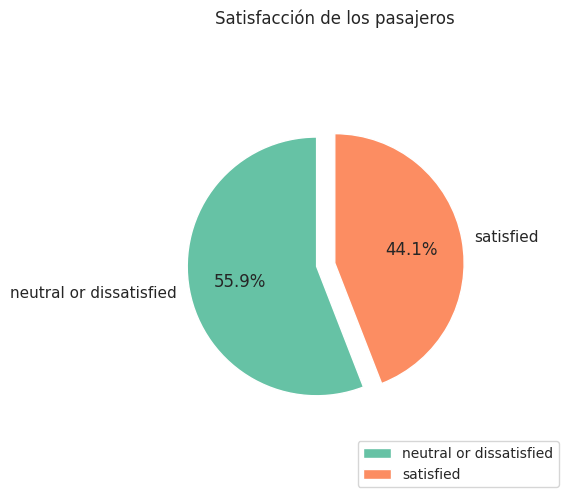

In [12]:
#Representación del porcentaje de pasajeros satisfechos y no satisfechos

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(satisfaccion_porcentaje,labels=df.satisfaction.value_counts().index,
    radius=0.7,startangle=90,explode=(0.1, 0),autopct='%1.1f%%')

plt.legend(loc="lower right", labels=df.satisfaction.value_counts().index,fontsize=10)
plt.title("Satisfacción de los pasajeros")
plt.show()




 Solo el 44.1% de los pasajeros están satisfechos, mientras que el 55.9% está neutral o insatisfecho.

# ¿Cómo se distribuyen los pasajeros de viajes de trabajo y personales según la clase en la que viajan?”

Hay un patrón claro que hay una fuerte relación entre el tipo de viaje y la clase elegida. Business es la clase más asociada a viajes de trabajo.

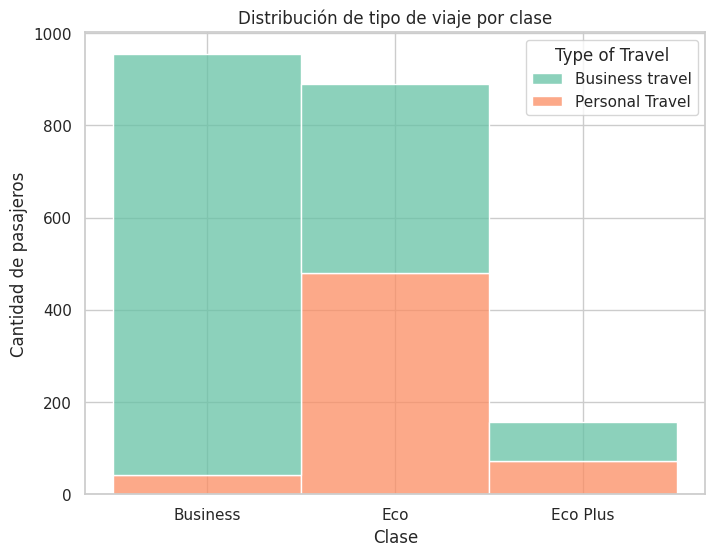

In [13]:
# Grafico de barras  - Distribución de pasajeros por tipo de viaje y clase
plt.figure(figsize=(8, 6))
bin_width = 10
bin_range = range(170, 250, bin_width)

sns.histplot(data=df, x="Class", hue="Type of Travel", multiple="stack", bins=bin_range)

plt.title("Distribución de tipo de viaje por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# ¿En qué medida la clase del vuelo y el tipo de viaje impacta en el nivel de satisfacción del pasajero?

Cantidad de Pasajeros por Clase


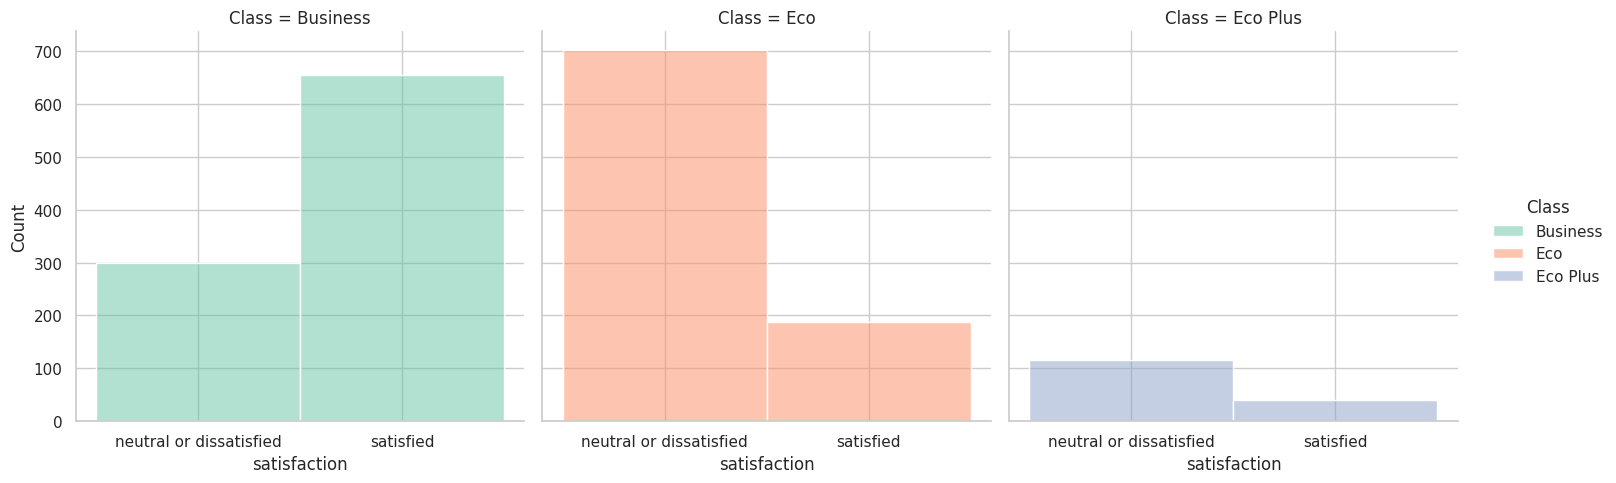

In [14]:

#Cantidad de pasajeros satisfechos y no satisfechos/ neutros por clase

bin_width = 10
bin_range = range(170, 250, bin_width)


sns.displot(data=df, x="satisfaction", hue="Class", col="Class", bins=bin_range)
print ("Cantidad de Pasajeros por Clase")

La clase del vuelo tiene un impacto significativo en el nivel de satisfacción del pasajero: a medida que la clase mejora aumenta la satisfacción general.

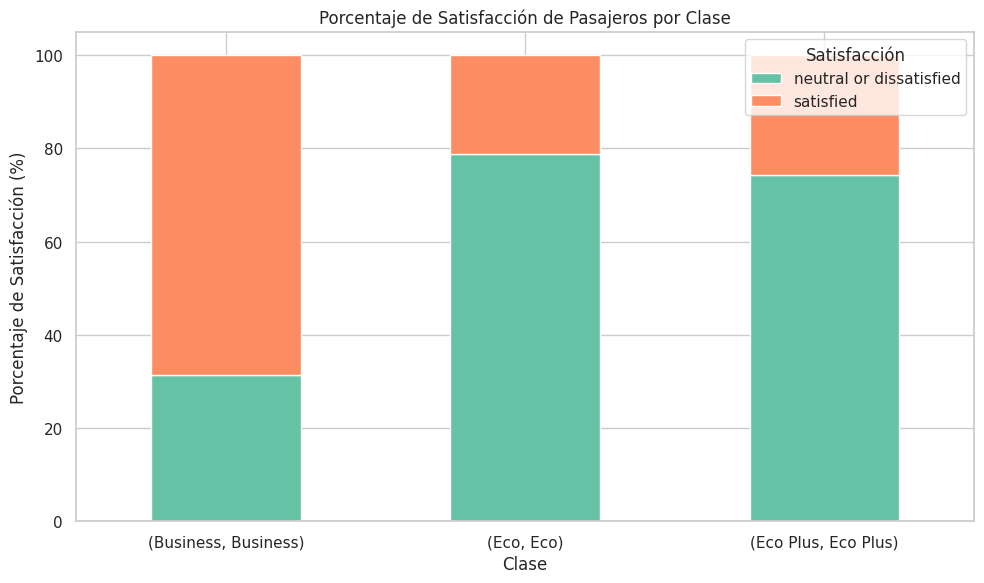

In [15]:
# Grafico de barras - Porcentaje de satisfaccion de pasajeros por clase
plt.figure(figsize=(10, 6))
satisfaccion_clase.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Porcentaje de Satisfacción de Pasajeros por Clase")
plt.xlabel("Clase")
plt.ylabel("Porcentaje de Satisfacción (%)")
plt.xticks(rotation= 0)
plt.legend(title="Satisfacción")
plt.tight_layout()
plt.show()

# ¿Existe relación entre la edad y la satisfacción  dependiendo del tipo de viaje (trabajo o personal)?

Los pasajeros que realizan viajes por trabajo muestran una distribución de edad más concentrada, especialmente entre 30 y 50 años.
En viajes personales, la distribución de edades es más amplia y hay mayor cantidad de outliers en edades jóvenes y mayores por lo que la edad no tenga impacto directo en la satisfacción.

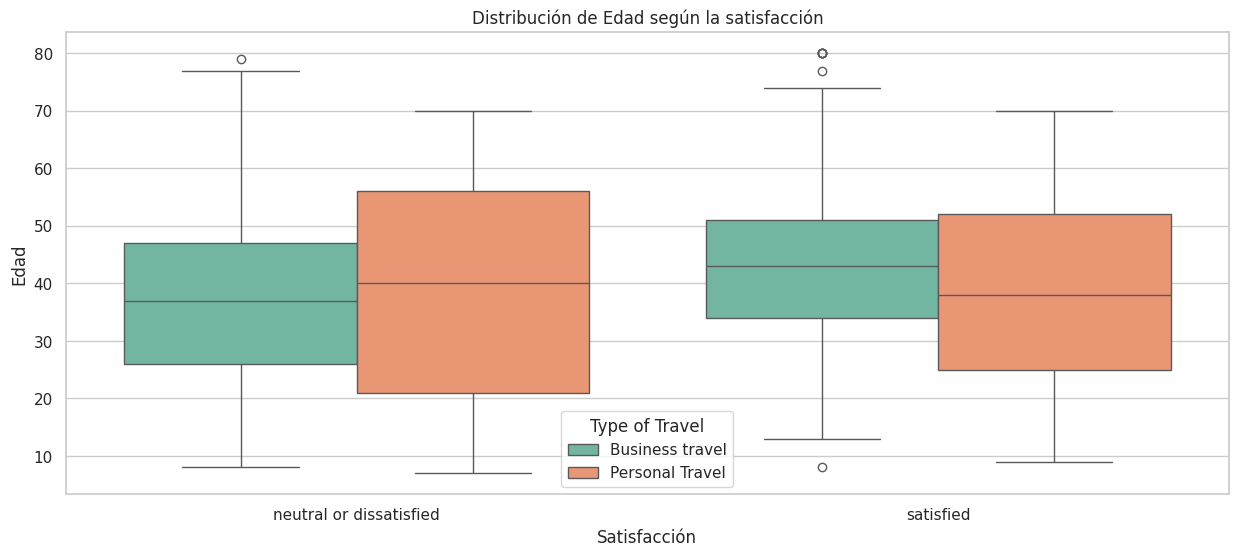

In [16]:
# Boxplot - Distribución por edad y su relación con la satisfacción

plt.figure(figsize=(15,6))
sns.boxplot(data=df,x="satisfaction",y="Age",hue="Type of Travel")
plt.title("Distribución de Edad según la satisfacción")
plt.xlabel("Satisfacción")
plt.ylabel("Edad")
plt.show()


In [17]:
# Análisis de Outliers para la variable edad


edad = df['Age']
q1 = np.percentile(edad, 25)
q3 = np.percentile(edad, 75)

q31 = q3 - q1
mask_edad = (edad < q3 + 1.5 * q31) & (edad > q1 - 1.5 * q31)

print('La cantidad de outliers de la variable:', len(edad[~mask_edad]))


La cantidad de outliers de la variable: 0


Al análisar el bloxplot para la edad, se procedió a análizar la variable edad para detectar si hay outliers. Confirmamos que no hay valores atípicos en el rango inferior ni superior. Los que se encontraban en la parte superior corresponden a pasajeros de edad avanzada. Los casos detectados no son anomalias en los datos ni errores, por lo que se conservan todos los registros.

# ¿Hay algún servicio que tenga más impacto en relación a la satisfacción?

Podemos ver la valoración promedio de las características de servicio, agrupado por el nivel de satisfacción del cliente, revelando los que más afectan al momento de valorar la experiencia.

En promedio, el servicio que mejor valoración tiene para los clientes satisfechos es la experiencia de check in online. Este mismo servicio es uno de los de menor valoración para aquellos no satisfechos o neutros, por lo que seria un buen punto a revisar ya que puede marcar una gran diferencia para los pasajeros.

En cambio, el servicio que promedia menor valoración en aquellos no satisfechos o neutros es el servicio de wifi. Este también seria un servicio a analizar ya que aun en los que se muestran satisfechos, no tienen una buena valoracion promedio en *general*.



In [18]:
Servicios = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                     'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                     'Inflight entertainment', 'On-board service', 'Leg room service',
                     'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df_melted = df.melt(id_vars=['satisfaction'], value_vars=Servicios,
                    var_name='Service Feature', value_name='Valoracion')

In [19]:
# Valoración promedio para cada servicio
valoracion_promedio = df_melted.groupby('Service Feature')['Valoracion'].mean().sort_values(ascending=False).index

In [20]:
#Cantidad de pasajeros leales
df['Customer Type'].value_counts()


,count
Customer Type,
Loyal Customer,1640
disloyal Customer,360


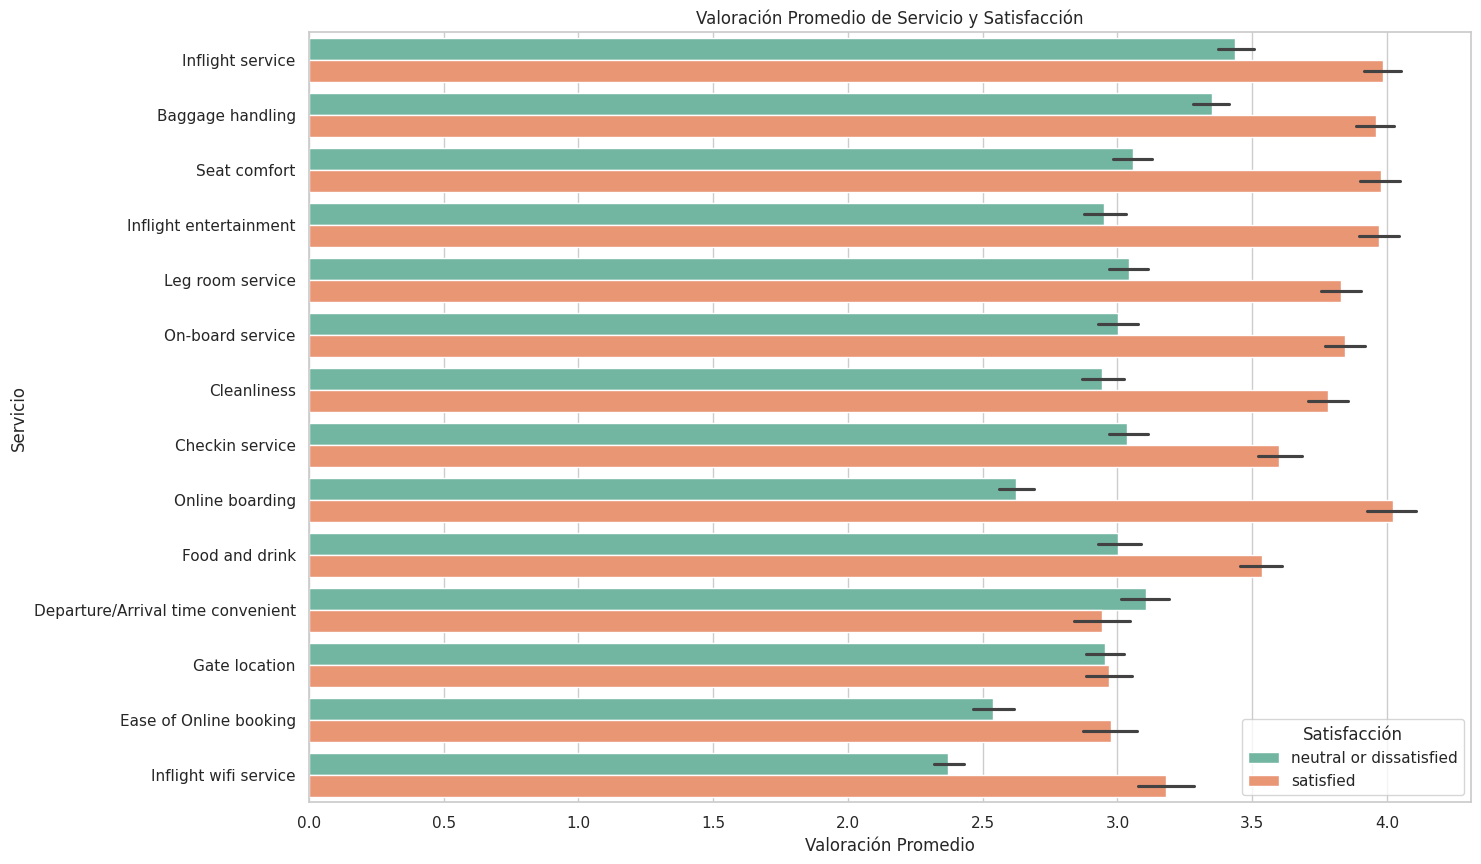

In [21]:
# Relación entre la valoración Promedio de cada servicio y la satisfacción

plt.figure(figsize=(15, 10))

sns.barplot(data=df_melted, x='Valoracion', y='Service Feature', hue='satisfaction',
            order=valoracion_promedio)

plt.title('Valoración Promedio de Servicio y Satisfacción')
plt.xlabel('Valoración Promedio')
plt.ylabel('Servicio')
plt.legend(title='Satisfacción')

plt.show()


In [22]:
#Cantidad de pasajeros Leales
df['Customer Type'].value_counts()


,count
Customer Type,
Loyal Customer,1640
disloyal Customer,360


Text(0, 0.5, 'Cantidad de Pasajeros')

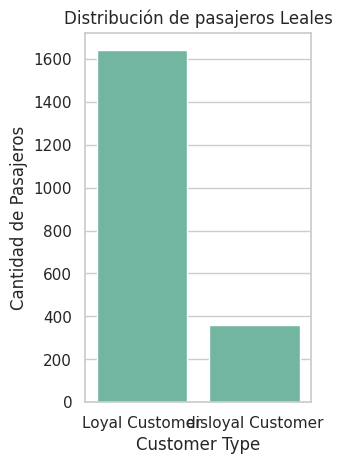

In [23]:
# Distribución de Clientes Leales
plt.subplot(1, 2, 1)
sns.countplot(x='Customer Type', data=df)
plt.title('Distribución de pasajeros Leales')
plt.ylabel('Cantidad de Pasajeros')

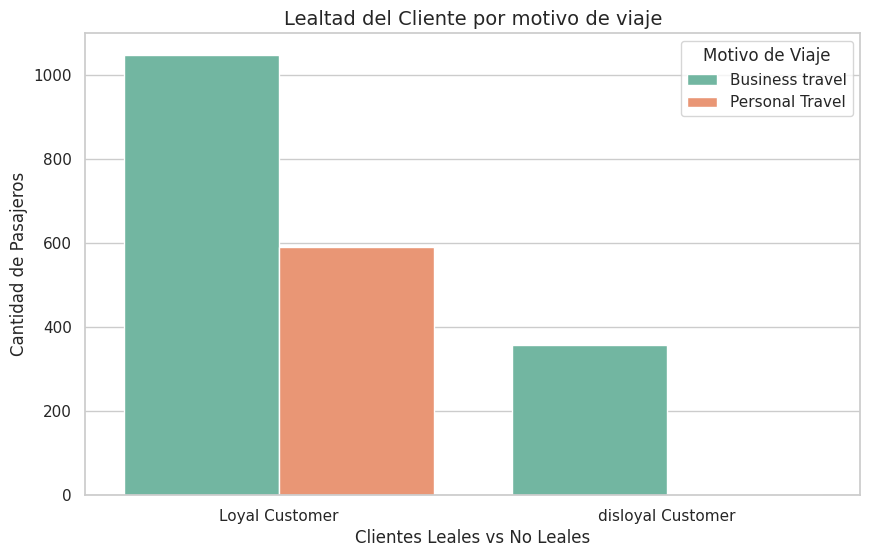

In [24]:
# Gráfico de barras de Lealtad de los clientes segun tipo de viaje

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer Type', hue='Type of Travel')
plt.title('Lealtad del Cliente por motivo de viaje', fontsize=14)
plt.xlabel('Clientes Leales vs No Leales', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Motivo de Viaje')

plt.show()

Para el entrenamiento del modelo, se usarán las variables más relevantes  basándonos en el análisis anterior.
  ** Variables Categóricas: **
  Type of Travel y Class: Como validamos en la hipótesis, son los  principales factores del comportamiento del pasajero.
  Customer Type: Un cliente leal tiene expectativas diferentes a uno desleal.


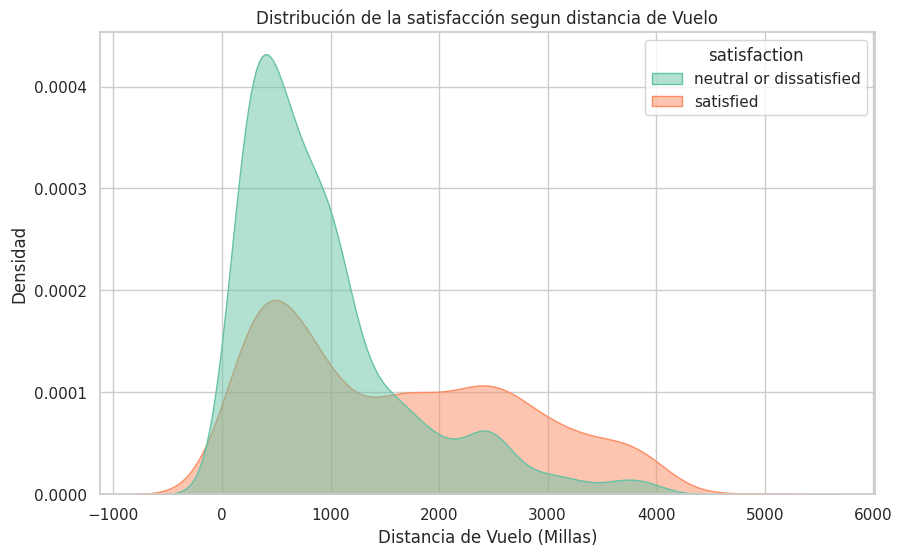

In [25]:
# Relación entre la satisfacción y la distancia de vuelo

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Flight Distance', hue='satisfaction', fill=True, alpha=0.5)

plt.title('Distribución de la satisfacción segun distancia de Vuelo')
plt.xlabel('Distancia de Vuelo (Millas)')
plt.ylabel('Densidad')
plt.show()



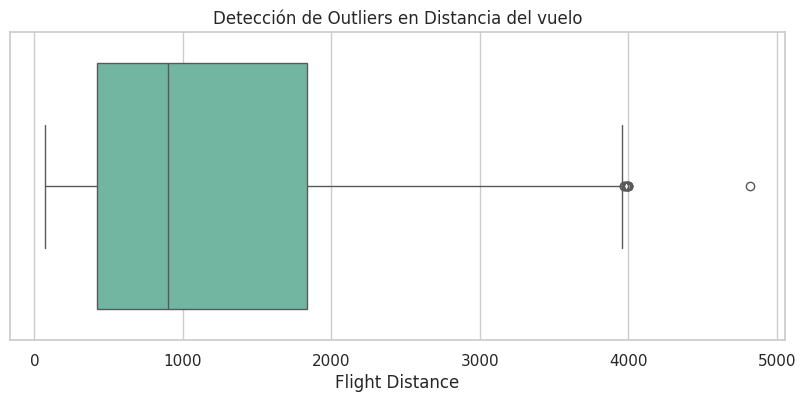

Límite superior calculado: 3957.5 millas
Cantidad de vuelos outliers detectados: 10


In [26]:
# Detección de outliers en la variable distancia del vuelo


plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Flight Distance'])
plt.title('Detección de Outliers en Distancia del vuelo')
plt.show()

Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

outliers_vuelo = df[df['Flight Distance'] > limite_superior]
print(f"Límite superior calculado: {limite_superior} millas")
print(f"Cantidad de vuelos outliers detectados: {len(outliers_vuelo)}")



**Manejo de outliers de la variable Distancia:**

Se detectaron valores superiores al límite. Estos corresponden a vuelos de larga distancia reales y es importante que el modelo aprenda a evaluar la satisfacción también en estos trayectos más largos. . La experiencia del pasajero puede ser más crítica en los servicios provistos en estos trayectos por el tiempo de vuelo. Se decide no eliminar estos registros.

In [27]:
cat_features = ['Class', 'Type of Travel', 'Customer Type']
num_features = ['Online boarding', 'Inflight wifi service',
                'Flight Distance','Age']

In [28]:

# Mapeamos los valores de la columna 'satisfaction' a valores numéricos (1 para 'satisfied', 0 para 'neutral or dissatisfied')

df['satisfaction_valor'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
df


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_valor
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,2,5,5,50,44,satisfied,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,3,4,5,0,0,satisfied,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,4,1,3,2,2,2,0,0,neutral or dissatisfied,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,3,1,4,0,6,satisfied,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,4,2,4,0,20,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,28477,Male,Loyal Customer,25,Personal Travel,Eco,1721,1,5,1,...,5,3,3,4,4,5,0,4,neutral or dissatisfied,0
1996,117057,Female,Loyal Customer,41,Business travel,Business,2026,3,3,3,...,3,3,3,3,3,3,0,0,neutral or dissatisfied,0
1997,106829,Male,Loyal Customer,46,Personal Travel,Eco Plus,1488,3,4,3,...,3,3,5,4,5,1,5,0,neutral or dissatisfied,0
1998,98054,Male,Loyal Customer,39,Personal Travel,Eco,1797,4,2,4,...,3,2,2,1,3,2,15,12,satisfied,1


In [29]:

# Importar librerias para modelos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [30]:

# Definición de variables y encoding

X = df[['Class', 'Type of Travel', 'Online boarding', 'Inflight wifi service',
        'Flight Distance','Customer Type', 'Age']]
y = df['satisfaction_valor']

X = pd.get_dummies(X, columns=cat_features, drop_first=False)


display(X.head())
display (y.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

,Online boarding,Inflight wifi service,Flight Distance,Age,Class_Business,Class_Eco,Class_Eco Plus,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,4,5,160,52,False,True,False,True,False,True,False
1,4,1,2863,36,True,False,False,True,False,True,False
2,2,2,192,20,False,True,False,True,False,False,True
3,4,0,3377,44,True,False,False,True,False,True,False
4,1,2,1182,49,False,True,False,True,False,True,False


,satisfaction_valor
0,1
1,1
2,0
3,1
4,1


# 1ER MODELO - REGRESION LOGISTICA

In [31]:

# Entrenamiento modelo de Regresión Logistica

modelo = LogisticRegression(max_iter=3000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [32]:
# VALIDACION DEL MODELO
y_pred = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8283333333333334

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       342
           1       0.79      0.82      0.80       258

    accuracy                           0.83       600
   macro avg       0.82      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600


Matriz de confusión:
 [[286  56]
 [ 47 211]]


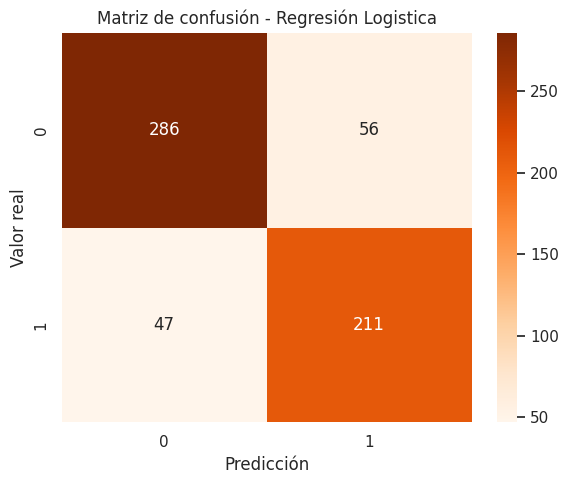

In [33]:
# MATRIZ DE CONFUSION - MODELO REGRESION LOGISTICA

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de confusión - Regresión Logistica')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3991436090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='Set2')


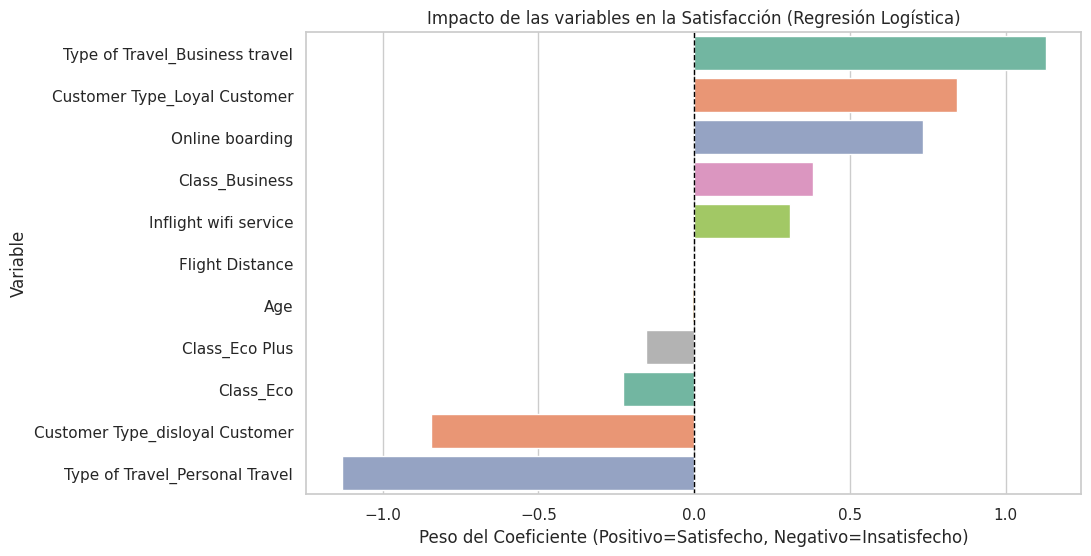

In [34]:
# Variables relevantes para la satisfacción

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='Set2')
plt.title('Impacto de las variables en la Satisfacción (Regresión Logística)')
plt.xlabel('Peso del Coeficiente (Positivo=Satisfecho, Negativo=Insatisfecho)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Línea central en 0
plt.show()

# 2DO MODELO - ARBOL DE DECISION

In [35]:
# MODELO ARBOL DEICISION

tree_model = DecisionTreeClassifier(
    random_state=42,
    max_depth= 5
)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.8866666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       342
           1       0.86      0.88      0.87       258

    accuracy                           0.89       600
   macro avg       0.88      0.89      0.88       600
weighted avg       0.89      0.89      0.89       600



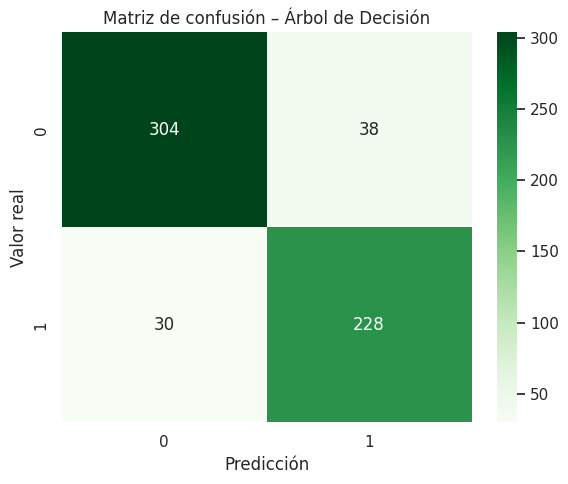

In [36]:
# Matriz de confusión para Arbol de decisión

cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6,5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de confusión – Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.tight_layout()
plt.show()


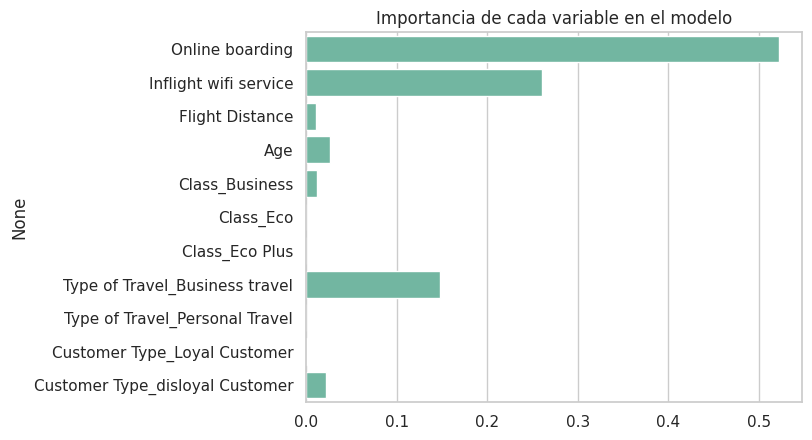

In [37]:
# Importancia de variables para el Árbol de Decisión

importances = tree_model.feature_importances_
columns = X.columns

sns.barplot(x=importances, y=columns)
plt.title('Importancia de cada variable en el modelo')
plt.show()

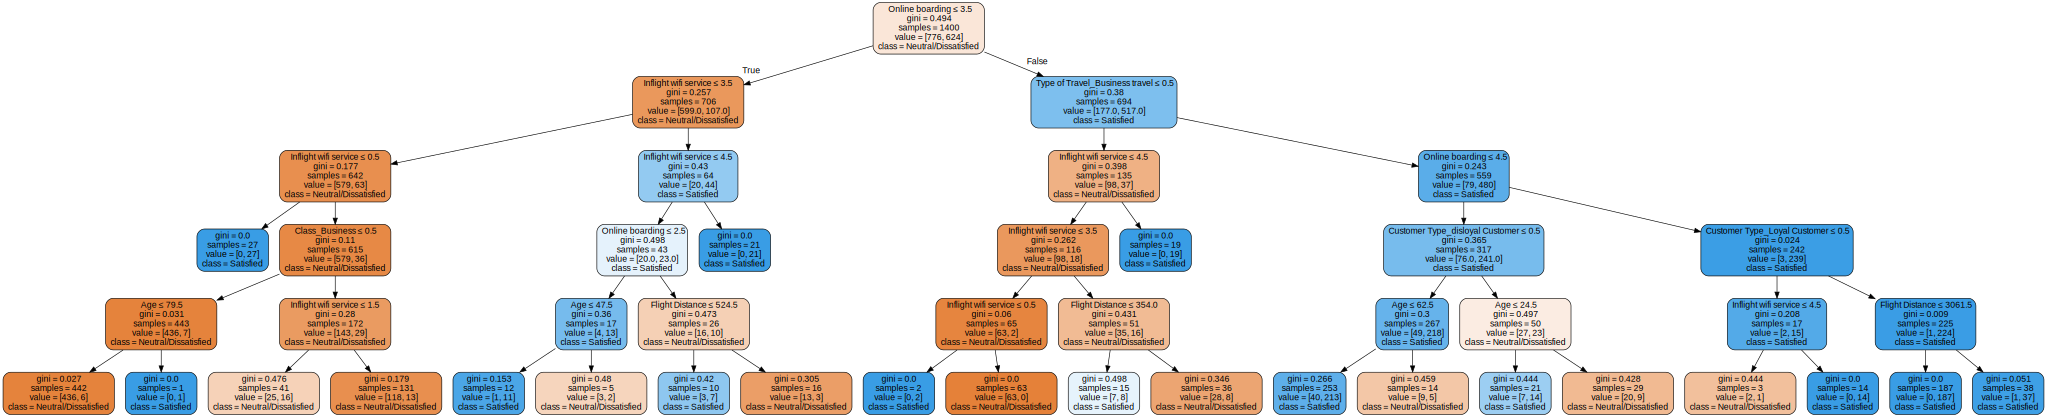

In [38]:
import graphviz
from sklearn import tree


nombres_clases = ['Neutral/Dissatisfied', 'Satisfied']

dot_data = tree.export_graphviz(tree_model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=nombres_clases,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph




# Conclusiones


El objetivo del trabajo fue analizar los factores que influyen en la satisfacción de los pasajeros de una aerolínea y desarrollar un modelo  capaz de clasificar a los clientes como satisfechos o no satisfechos/ neutros en función de distintas variables operativas y de servicio.

En este análisis se entrenaron dos modelos de clasificación para predecir la satisfacción del pasajero: ***regresión logística y árbol de decisión***.La idea de usar ambos es tener una visión más completa del problema y ver cual tiene mejores resultados para esta temática. Ambos tuvieron buenos resultados en general.

Basandose en el modelo de regresión logistica, se pueden ver relaciones directas que, tal como se planteó en la hipotesis, la Clase es un factor determinante. Los viajeros de Business que viajan por trabajo son el segmento con mayor probabilidad de satisfacción

Sin embargo, Árbol de Decisión permite ver con mayor claridad los pasos para decidir si un cliente está satisfecho o no y nos brinda unas reglas de negocio más faciles de trabajar. Este reveló que variables de servicio como el Check-in Online y el Wifi son predictores igual de críticos.

El Online Boarding y el servicio de Wifi aparecieron consistentemente como los divisores principales en el arbol de decisión. Un mal servicio de internet o un check-in complicado generan insatisfacción inmediata.

La Clase y Tipo de Viaje pueden potenciar la satisfacción pero no compensan las fallas en los servicios digitales que más esperan los usuarios.

Esto nos da un conocimiento más profundo que lo que se plantéo en la  hipótesis inicial: la clase importa, pero la experiencia puede ser un gran detractor  incluso un viaje en Business.

